Based on HW2, Scrape more date from "hongkong.sasa.com/", having corrected the construction erro of csv in HW2

Since Sa Sa decided to close its all stores in Taiwan market by 31 March, and focuses on its e-commerce business, let's see what we can analyse from its website about SaSa's sale strategies.

In [1]:
import requests
import bs4
import csv
from bs4 import BeautifulSoup
import pandas

In [2]:
def scrape_one_page(url):
    r = requests.get(url)
    mypage = BeautifulSoup(r.text)
    myitem = mypage.find_all('h2',attrs = {'class':'ellipsis'})
    mybrand=[]
    myproduct=[]
    for i in range(0,int(len(myitem)/2)):
        myproduct.append(myitem[2*i+1].text.strip())
        mybrand.append(myitem[2*i].text.strip())
    myp=mypage.find_all('p', attrs = {'class': 'fon-price'})
    myprice = []
    my  = []
    for myp in mypage.find_all('p', attrs = {'class': 'fon-price'}):
        myprice.append(myp.text)
    myprice.pop()
    for i in range(0,len(mybrand)):
        my.append([mybrand[i],myproduct[i],myprice[i]])
    return my

In [3]:
url_page1='http://hongkong.sasa.com/SasaWeb/tch/category/listByCategory.jspa?categoryId=218010000&l=2'
page1=scrape_one_page (url_page1)


c:\python.36\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\python.36\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [4]:
page_next=[]
for q in range(1,43):
    page_number=str(q+1)
    url_next=url_page1 + "&page=" + page_number
    page_next.extend(scrape_one_page(url_next))
    
page_all=page1+page_next

c:\python.36\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\python.36\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [5]:
len (page_all)

929

Analyse the data via pandas

In [6]:
with open('sasahkproduct.csv', 'w', encoding='utf-8',newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerows(page_all)

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams['font.sans-serif']=['SimHei']

In [8]:
df = pandas.read_csv('sasahkproduct.csv', header=None, names=['brand', 'product', 'price'])

Change the type of index in df'price' as number type

In [9]:
for index, myp in enumerate(df['price']):
    df['price'][index] = float(myp.split('$')[1])

Analyse the price distribution

In [10]:
df[df['price']== df['price'].max()]

,brand,product,price
448,雅萌,Ya-Man RF射頻再生美顏機 (1piece),2980


In [11]:
df[df['price']== df['price'].min()]

,brand,product,price
821,中華藥膜,中華藥膜冬蟲夏草睡眠面膜 (20g),7.5
865,中華藥膜,中華藥膜靈芝蜂膠面膜 (20g),7.5


<BarContainer object of 929 artists>

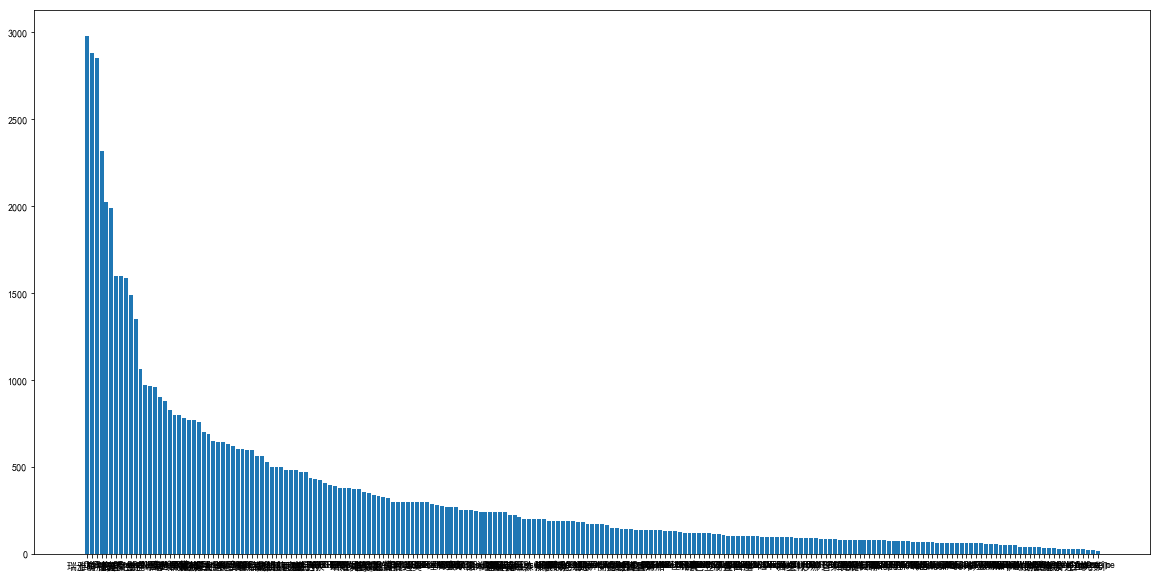

In [12]:
df1=df.sort_values(by='price', ascending= False)
fig = plt.figure(figsize = (20,10))
plt.bar(df1['brand'],df1['price'])

In [13]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0

for i in range(0,len(df['price'])):
    if df['price'][i]<=200:
        a1 = a1 + 1
    else:
        if df['price'][i]<=500:
            a2 = a2+1
        else:
            if df['price'][i]<=1000:
                a3 = a3 + 1
            else:
                a4= a4 + 1

b = {'0-200':a1,'200-500':a2, '500-1000':a3, '2000以上':a4}
print(b)

{'0-200': 593, '200-500': 240, '500-1000': 67, '2000以上': 29}


([<matplotlib.patches.Wedge at 0x2a64af95c50>,
 [Text(-1.00018,-0.457875,'0-200'),
  Text(1.09259,0.127498,'200-500'),
  Text(0.439275,1.00848,'500-1000'),
  Text(0.107243,1.09476,'2000以上')],
 [Text(-0.54555,-0.24975,'63.67%'),
  Text(0.595956,0.0695442,'26.37%'),
  Text(0.239605,0.550081,'6.86%'),
  Text(0.0584962,0.597142,'3.11%')])

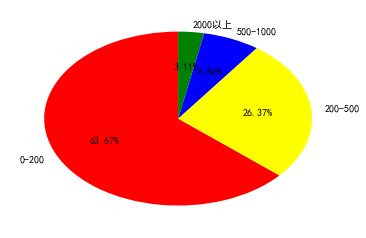

In [14]:
labels =['0-200', '200-500', '500-1000','2000以上'] 
sizes = [594, 246, 64, 29]
colors = ['red', 'yellow', 'blue', 'green']
explode = (0, 0, 0, 0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%', shadow = False, startangle =90, pctdistance = 0.6)

Find the top 10 most popular brands:

<BarContainer object of 10 artists>

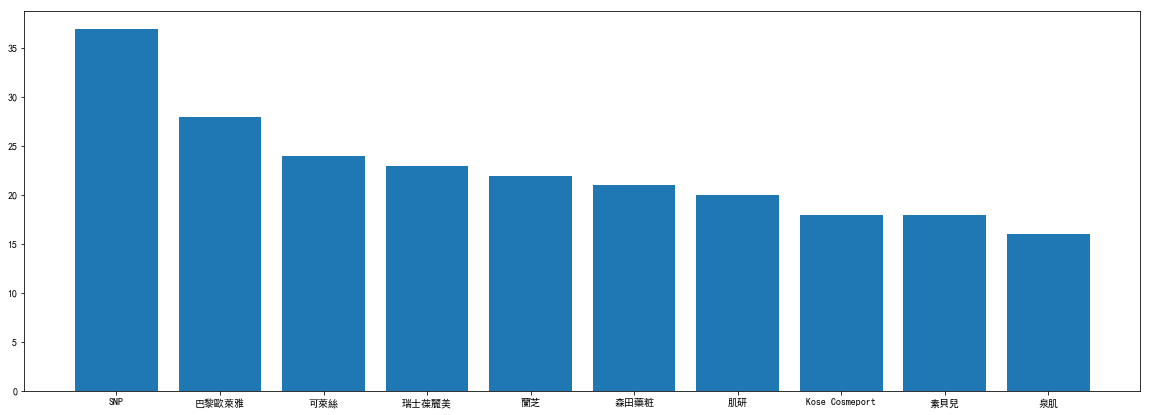

In [15]:
fig = plt.figure(figsize = (20,7))
value = df['brand'].value_counts()[:10]
plt.bar(df['brand'].value_counts()[:10].index,value)

Find top 10 most popular brands under 200 HKD

<BarContainer object of 10 artists>

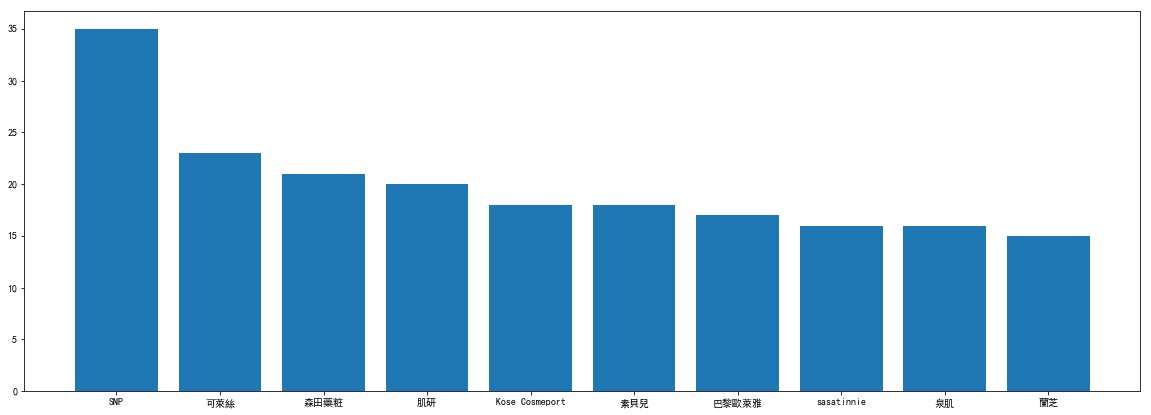

In [16]:
df2=df[(df['price'] <= 200)]
fig = plt.figure(figsize = (20,7))
value = df2['brand'].value_counts()[:10]
plt.bar(df2['brand'].value_counts()[:10].index,value)

To conclude, the major price stratege focuses on price under 200 HKD, 

and brand stratege mostly focuses on the affordable brands.